In [1]:
import numpy as np
import sklearn 
import kmapper as km
import matplotlib.pyplot as plt
import os
import pickle
import glob
import cv2
import io
import sys
import base64
import random
import keras.applications as k
from keras.models import Model
from keras.layers import Lambda,Reshape,Flatten,Input,Dense
import shap

Using TensorFlow backend.
c:\tensorflow\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
c:\tensorflow\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
c:\tensorflow\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
c:\tensorflow\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passing (type, 1) or '1

In [6]:
path = 'C:\Codes\datasets\cat_dog_dataset\PetImages'
cat_dataset_path = path + '\Cat\*.jpg'
dog_dataset_path = path + '\Dog\*.jpg'
rodent_dataset_path = path + '\Rodent\*.jpeg'
space_dataset_path = path + '\Space\*.jpg'

dataset_path = [cat_dataset_path,dog_dataset_path]

html_path = 'C:\Codes\TDA_mapper_output_html'

img_shape = 128
batch_size = 4

image_pickle = path + '\x_'+str(img_shape)+'.pickle'
label_pickle = path + '\y_'+str(img_shape)+'.pickle'

if os.path.exists(image_pickle) and os.path.exists(label_pickle):
    pickle_out_x = open(image_pickle,'rb')
    x = pickle.load(pickle_out_x)
    pickle_out_x.close()

    pickle_out_y = open(label_pickle,'rb')
    y = pickle.load(pickle_out_y)
    pickle_out_y.close()

else:
    def load_data(data_paths,size):
        data = []
        for data_path in data_paths:
            paths = sorted(glob.glob(data_path))
            class_num = data_paths.index(data_path)
            print(class_num)
            count = 0
            for path in paths:
                try:
                    img = cv2.imread(path,1)
                    img = cv2.resize(img,(img_shape,img_shape),interpolation=cv2.INTER_CUBIC)
                    data.append([np.asarray(img),class_num])
                    count += 1
                except Exception as e:
                    print(path)
                    pass
        return data

    dataset = load_data(dataset_path,batch_size)
    random.shuffle(dataset)
    x = []
    y = []

    for images,labels in dataset:
        x.append(images)
        y.append(labels)  
    
    x,y = np.array(x),np.array(y)
    #x = preprocess_input(x)
    print(x.shape,y.shape)
    
    pickle_in_x = open(image_pickle,'wb')
    pickle.dump(x,pickle_in_x)
    pickle_in_x.close()

    pickle_in_y = open(label_pickle,'wb')
    pickle.dump(y,pickle_in_y)
    pickle_in_y.close()

ratio = 2    
x,y = x[:batch_size*ratio],y[:batch_size*ratio]

y = np.reshape(y,newshape=(batch_size*ratio,1))
print(x.shape,y.shape)


(8, 128, 128, 3) (8, 1)


In [7]:
models = [
               k.xception.Xception,
               #k.vgg16.VGG16,
               k.vgg19.VGG19,
               k.resnet50.ResNet50,
               #k.resnet101.ResNet101,
               #k.resnet.ResNet152,
               #k.resnet_v2.ResNet50V2,
               #k.resnet_v2.ResNet101V2,
               #k.resnet_v2.ResNet152V2,
               #k.resnet.resnext.ResNeXt50,
               #k.resnet.resnext.ResNeXt101,
               #k.inception_v3.InceptionV3,
               k.inception_resnet_v2.InceptionResNetV2,
               k.mobilenet.MobileNet,
               #k.densenet.DenseNet121,
               #k.densenet.DenseNet169,
               k.densenet.DenseNet201,
               #k.nasnet.NASNetMobile,
               k.nasnet.NASNetLarge
          ]

model = models[1](include_top=False)
model.trainable = False
model.compile(optimizer='Adam',loss='mse')

x0 = Input(shape=(img_shape,img_shape,3))
y0 = model(x0)
y0 = Flatten()(y0)
y0 = Dense(1,activation='sigmoid')(y0)

new_model = Model(inputs=x0,outputs=y0)
new_model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])
print(new_model.input_shape,new_model.output_shape,x.shape)
new_model.fit(x,y,epochs=10)
shap_val = shap.DeepExplainer(new_model,x).shap_values(x)

(None, 128, 128, 3) (None, 1) (8, 128, 128, 3)
Epoch 1/10
8/8 [==============================] - 0s 62ms/step - loss: 4.5229 - acc: 0.6250
Epoch 2/10
8/8 [==============================] - 0s 16ms/step - loss: 2.7563 - acc: 0.7500
Epoch 3/10
8/8 [==============================] - 0s 17ms/step - loss: 2.0148 - acc: 0.8750
Epoch 4/10
8/8 [==============================] - 0s 17ms/step - loss: 2.0148 - acc: 0.8750
Epoch 5/10
8/8 [==============================] - 0s 17ms/step - loss: 2.0148 - acc: 0.8750
Epoch 6/10
8/8 [==============================] - 0s 17ms/step - loss: 2.0148 - acc: 0.8750
Epoch 7/10
8/8 [==============================] - 0s 17ms/step - loss: 2.0148 - acc: 0.8750
Epoch 8/10
8/8 [==============================] - 0s 17ms/step - loss: 2.0148 - acc: 0.8750
Epoch 9/10
8/8 [==============================] - 0s 17ms/step - loss: 2.0148 - acc: 0.8750
Epoch 10/10
8/8 [==============================] - 0s 17ms/step - loss: 2.0148 - acc: 0.8750


(1, 8, 128, 128, 3)


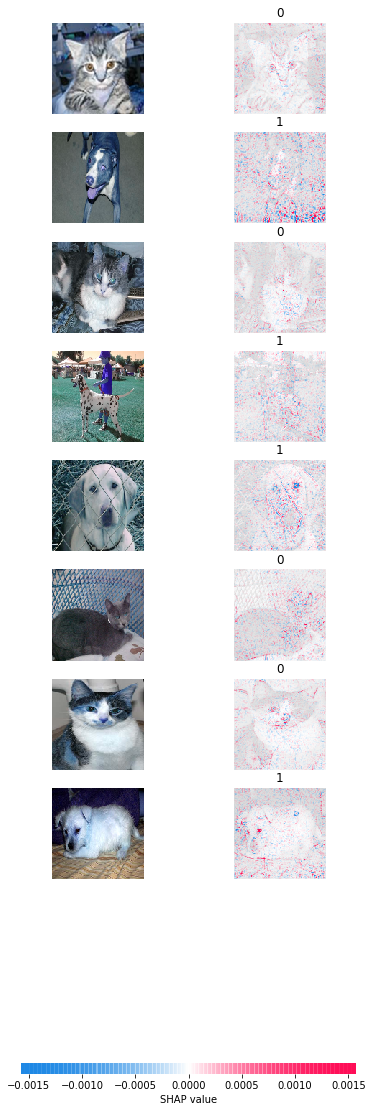

In [8]:
#new_model.output_shape
#print(shap_val)
print(np.array(shap_val).shape)
shap.image_plot(shap_val,x.astype(np.float32),labels=y)

In [1]:
x_transformed = np.reshape(model.predict(x),newshape=(batch_size,-1))
#x_transformed = np.reshape(x,newshape=(batch_size,-1))
print(x_transformed.shape)
mapper = km.KeplerMapper(verbose=2)
projected_data = mapper.fit_transform(x_transformed,projection=sklearn.manifold.TSNE())

NameError: name 'np' is not defined

Mapping on data shaped (5000, 2) using lens shaped (5000, 2)

Minimal points in hypercube before clustering: 8
Creating 2500 hypercubes.
Cube_0 is empty.

Cube_1 is empty.

Cube_2 is empty.

Cube_3 is empty.

Cube_4 is empty.

Cube_5 is empty.

Cube_6 is empty.

Cube_7 is empty.

Cube_8 is empty.

Cube_9 is empty.

Cube_10 is empty.

Cube_11 is empty.

Cube_12 is empty.

Cube_13 is empty.

Cube_14 is empty.

Cube_15 is empty.

Cube_16 is empty.

Cube_17 is empty.

Cube_18 is empty.

Cube_19 is empty.

Cube_20 is empty.

Cube_21 is empty.

Cube_22 is empty.

Cube_23 is empty.

Cube_24 is empty.

Cube_25 is empty.

Cube_26 is empty.

Cube_27 is empty.

Cube_28 is empty.

Cube_29 is empty.

Cube_30 is empty.

Cube_31 is empty.

Cube_32 is empty.

Cube_33 is empty.

Cube_34 is empty.

Cube_35 is empty.

Cube_36 is empty.

Cube_37 is empty.

Cube_38 is empty.

Cube_39 is empty.

Cube_40 is empty.

Cube_41 is empty.

Cube_42 is empty.

Cube_43 is empty.

Cube_44 is empty.

Cube_45 is empty.


   > Found 1 clusters.

   > Found 1 clusters.

Cube_670 is empty.

   > Found 1 clusters.

   > Found 1 clusters.

   > Found 1 clusters.

Cube_674 is empty.

Cube_675 is empty.

Cube_676 is empty.

   > Found 1 clusters.

Cube_678 is empty.

Cube_679 is empty.

   > Found 1 clusters.

   > Found 1 clusters.

   > Found 1 clusters.

Cube_683 is empty.

   > Found 1 clusters.

Cube_685 is empty.

   > Found 1 clusters.

Cube_687 is empty.

   > Found 1 clusters.

   > Found 1 clusters.

   > Found 1 clusters.

   > Found 1 clusters.

   > Found 1 clusters.

Cube_693 is empty.

   > Found 1 clusters.

   > Found 1 clusters.

   > Found 1 clusters.

   > Found 1 clusters.

   > Found 1 clusters.

   > Found 1 clusters.

   > Found 1 clusters.

   > Found 1 clusters.

   > Found 1 clusters.

   > Found 1 clusters.

   > Found 1 clusters.

   > Found 1 clusters.

   > Found 1 clusters.

   > Found 1 clusters.

   > Found 1 clusters.

   > Found 1 clusters.

   > Found 1 clusters.

Cube_711


Created 1204 edges and 543 nodes in 0:00:00.700538.
Wrote visualization to: /home/sid/Codes/TDA/map.html


/home/sid/tensorflow/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


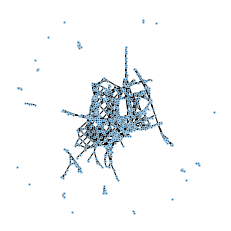

In [46]:
graph = mapper.map(projected_data,
                  clusterer=sklearn.cluster.DBSCAN(eps=50,min_samples=8,metric='haversine'),
                  cover=km.Cover(50,0.25))

mapper.visualize(graph,title='Cat-Dog Mapper',path_html=html_path+'/map.html',color_function=y,custom_tooltips=y)
km.draw_matplotlib(graph)
plt.show()